In [1]:
%reset -f
# Sheet metal gauge reference: https://armstrongmetalcrafts.com/reference/SheetMetalGaugeWeight.aspx

# Manufacturing capabilities per value stream @ BAC
This code shows conservative boundaries for the allowed dimensions in each manufacturing value stream.

In [2]:
from capabilities import Capabilities
import pandas as pd
import matplotlib.pyplot as plt
import xlwings as xw
import os
for app in xw.apps: app.quit()

regions = ['TL', 'MPB', 'APB']
part_set_names = ['HT', 'WC', 'WD', 'AH', 'SA']

all_stats = {
    name: {
        'total_parts': 0,
        'unique_part_counts': {region: 0 for region in regions},
        'unique_part_percentages': {region: 0 for region in regions},
        'total_weight': 0,
        'weight_counts': {region: 0 for region in regions},
        'weight_percentages': {region: 0 for region in regions},
    }
    for name in part_set_names
}

Extracting dimensions from cost calculator. CWB example to start with.

In [3]:
path_e = r"C:\Users\EMedina\OneDrive - Baltimore Aircoil Company\Documents\Co-Op\Enrique + Stanley\Models\Cost\VS Costs\All Cost Calculator.xlsx"
path_s = r"C:\Users\ssalim\OneDrive - Baltimore Aircoil Company\Medina, Enrique Flores's files - Enrique + Stanley\Models\Cost\VS Costs\SA Cost Calculator.xlsx"
path = path_e if os.path.exists(path_e) else path_s
df = pd.read_excel(path, sheet_name='BAC Part List').iloc[1:].reset_index(drop=True)
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)

c:\Users\EMedina\AppData\Local\anaconda3\envs\BAC\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
def get_parts_by_set(df, part_set):
    if isinstance(part_set, str): part_set = [part_set]
    return df[df['Part Set'].isin(part_set)].copy()

def get_part_stats(local_stats):
    for region_stats in local_stats:
        for part_set_name in region_stats:
            all_stats[part_set_name]['total_parts'] += region_stats[part_set_name]['total_parts']
            all_stats[part_set_name]['total_weight'] += region_stats[part_set_name]['total_weight']
            for region in regions:               
                all_stats[part_set_name]['unique_part_counts'][region] += region_stats[part_set_name]['unique_part_counts'][region]
                all_stats[part_set_name]['weight_counts'][region] += region_stats[part_set_name]['weight_counts'][region]

    for part_set_name, stats in all_stats.items():
        total_parts = stats['total_parts']
        total_weight = stats['total_weight']
        unique_part_percentages = {}
        weight_percentages = {}
        for region in regions:
            unique_part_counts = stats['unique_part_counts'][region]
            unique_part_percentages[region] = (unique_part_counts / total_parts * 100) if total_parts > 0 else 0.0
            all_stats[part_set_name]['unique_part_percentages'] = unique_part_percentages
            weight_counts = stats['weight_counts'][region]
            weight_percentages[region] = (weight_counts / total_weight * 100) if total_weight > 0 else 0.0
            all_stats[part_set_name]['weight_percentages'] = weight_percentages
            
def plot_pie_chart(data, title):
    region_colors = {
        'APB': '#66c2a5',
        'MPB': '#4f8cd6',
        'TL': '#e74c3c'
    }

    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(data.values(), labels=None, autopct='%1.1f%%', startangle=0, 
                                      colors=[region_colors[region] for region in data.keys()], 
                                      explode=[0.015] * len(data))
    plt.title(title, fontsize=14, fontweight='bold')
    plt.axis('equal')
    
    # Add legend in bottom right corner
    plt.legend(wedges, data.keys(), loc='lower right', bbox_to_anchor=(1, 0))
    
    plt.show()
    
part_sets = []
for part_set in df['Part Set'].dropna().unique(): 
    part_sets.append(get_parts_by_set(df, part_set))
# part_sets.append(get_parts_by_set(df, 'GAC Reference (MPB)'))

# Plot manufacturing regions per material and gauge

                                                   WD
total_parts                                         1
unique_part_counts      {'TL': 0, 'MPB': 1, 'APB': 0}
total_weight                                    13.21
weight_counts       {'TL': 0, 'MPB': 13.21, 'APB': 0}
                                                   WC
total_parts                                         1
unique_part_counts      {'TL': 1, 'MPB': 0, 'APB': 0}
total_weight                                    44.28
weight_counts       {'TL': 44.28, 'MPB': 0, 'APB': 0}
                                                   SA
total_parts                                         3
unique_part_counts      {'TL': 3, 'MPB': 0, 'APB': 0}
total_weight                                    72.56
weight_counts       {'TL': 72.56, 'MPB': 0, 'APB': 0}
                                                   AH
total_parts                                         3
unique_part_counts      {'TL': 3, 'MPB': 0, 'APB': 0}
total_weight                

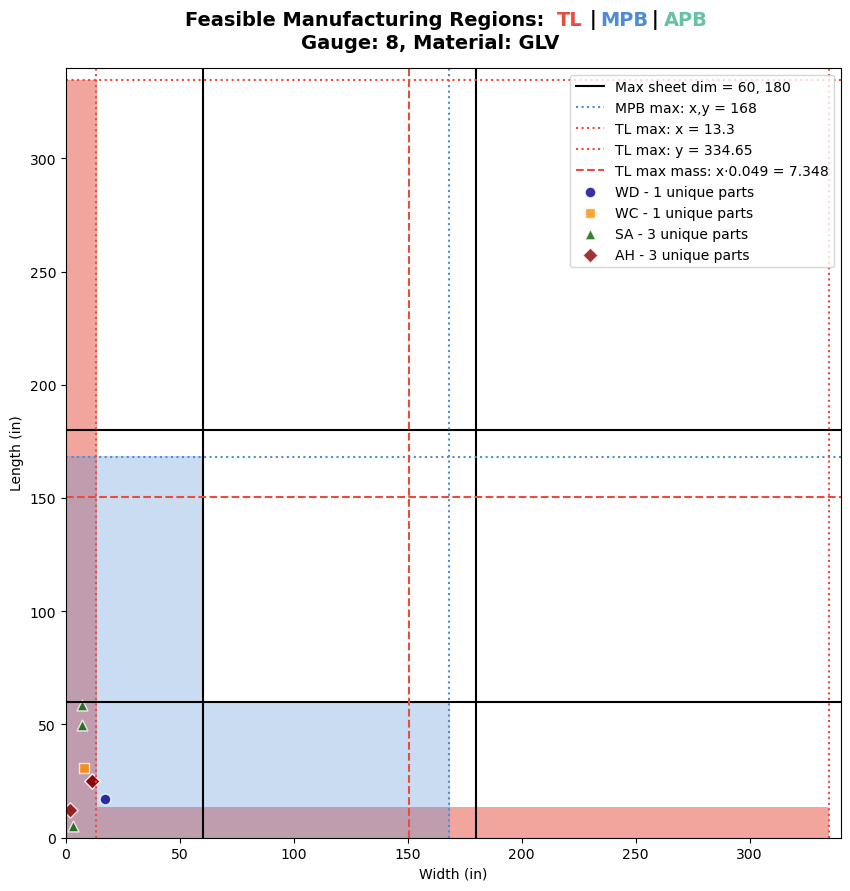

                                                        WC
total_parts                                              5
unique_part_counts           {'TL': 1, 'MPB': 4, 'APB': 0}
total_weight                                        434.29
weight_counts       {'TL': 53.81, 'MPB': 380.49, 'APB': 0}
                                                  SA
total_parts                                        1
unique_part_counts     {'TL': 1, 'MPB': 0, 'APB': 0}
total_weight                                    3.04
weight_counts       {'TL': 3.04, 'MPB': 0, 'APB': 0}


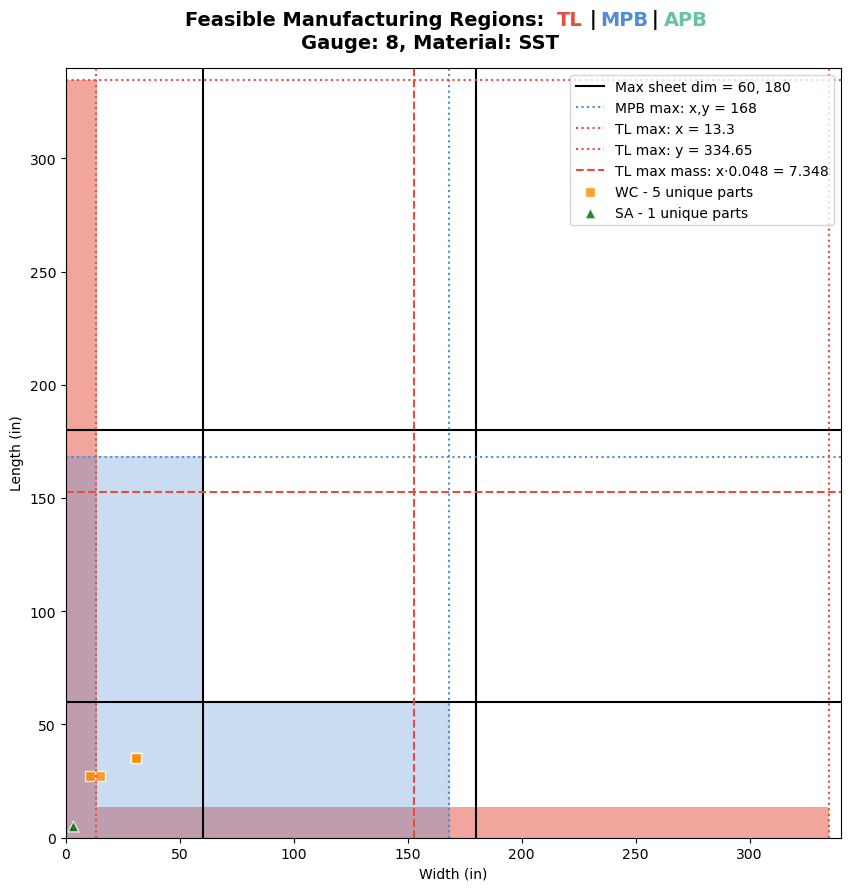

                                                   WD
total_parts                                         1
unique_part_counts      {'TL': 0, 'MPB': 1, 'APB': 0}
total_weight                                    18.34
weight_counts       {'TL': 0, 'MPB': 18.34, 'APB': 0}
                                                         WC
total_parts                                              23
unique_part_counts           {'TL': 20, 'MPB': 3, 'APB': 0}
total_weight                                        2119.82
weight_counts       {'TL': 1723.32, 'MPB': 396.5, 'APB': 0}
                                                          SA
total_parts                                               29
unique_part_counts            {'TL': 21, 'MPB': 8, 'APB': 0}
total_weight                                         2670.38
weight_counts       {'TL': 1892.03, 'MPB': 778.35, 'APB': 0}
                                                        AH
total_parts                                              5
unique_

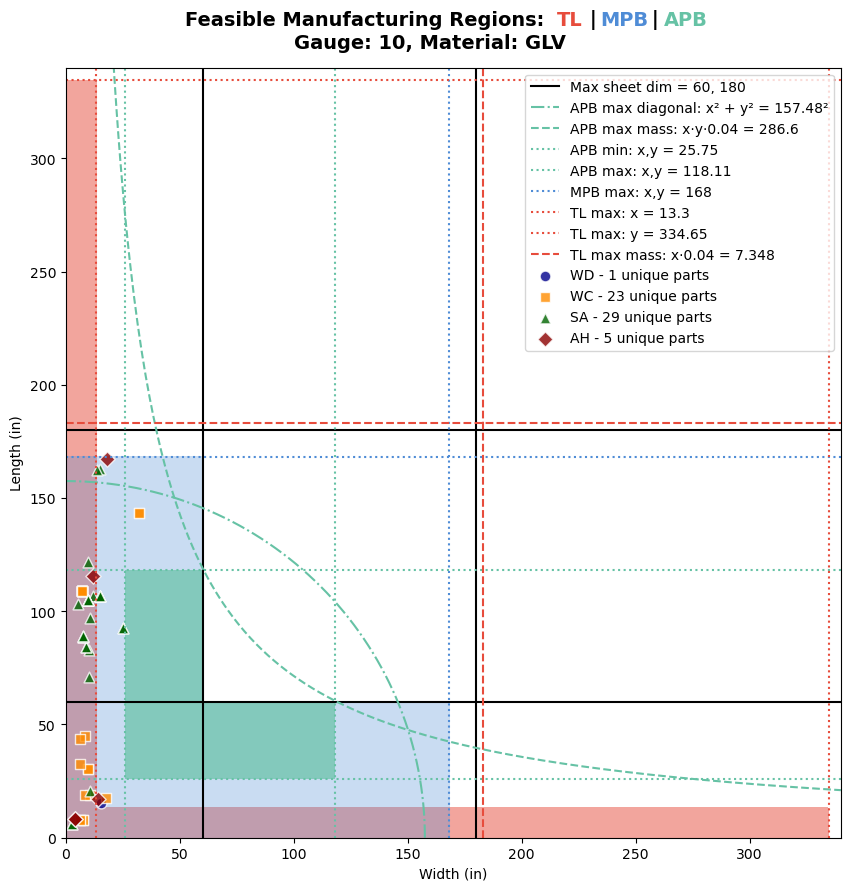

                                                   WD
total_parts                                         1
unique_part_counts      {'TL': 0, 'MPB': 1, 'APB': 0}
total_weight                                    18.49
weight_counts       {'TL': 0, 'MPB': 18.49, 'APB': 0}
                                                           WC
total_parts                                                45
unique_part_counts             {'TL': 0, 'MPB': 37, 'APB': 8}
total_weight                                         11854.46
weight_counts       {'TL': 0, 'MPB': 10150.6, 'APB': 1703.86}
                                                        SA
total_parts                                             21
unique_part_counts          {'TL': 15, 'MPB': 6, 'APB': 0}
total_weight                                        1994.7
weight_counts       {'TL': 1464.3, 'MPB': 530.4, 'APB': 0}
                                                        AH
total_parts                                              4
unique_

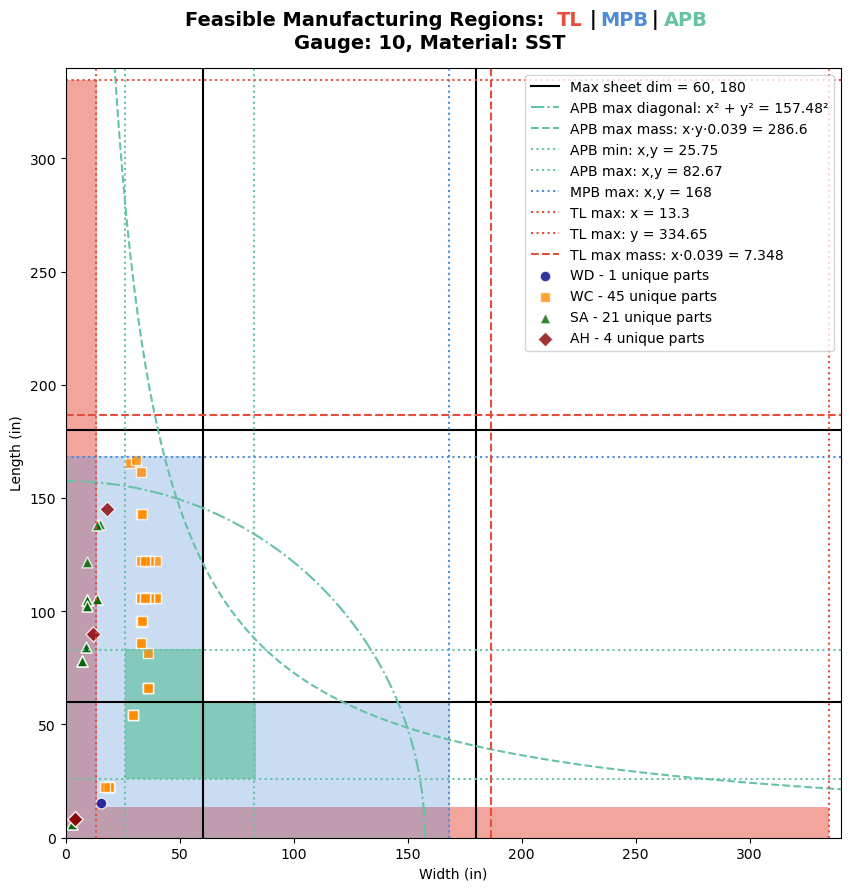

                                                    WD
total_parts                                          3
unique_part_counts       {'TL': 0, 'MPB': 3, 'APB': 0}
total_weight                                    185.78
weight_counts       {'TL': 0, 'MPB': 185.78, 'APB': 0}
                                                               WC
total_parts                                                    35
unique_part_counts                 {'TL': 4, 'MPB': 23, 'APB': 8}
total_weight                                              9071.75
weight_counts       {'TL': 93.73, 'MPB': 7906.63, 'APB': 1071.39}
                                                        SA
total_parts                                             10
unique_part_counts           {'TL': 9, 'MPB': 1, 'APB': 0}
total_weight                                        236.64
weight_counts       {'TL': 173.68, 'MPB': 62.95, 'APB': 0}
                                                    AH
total_parts                                  

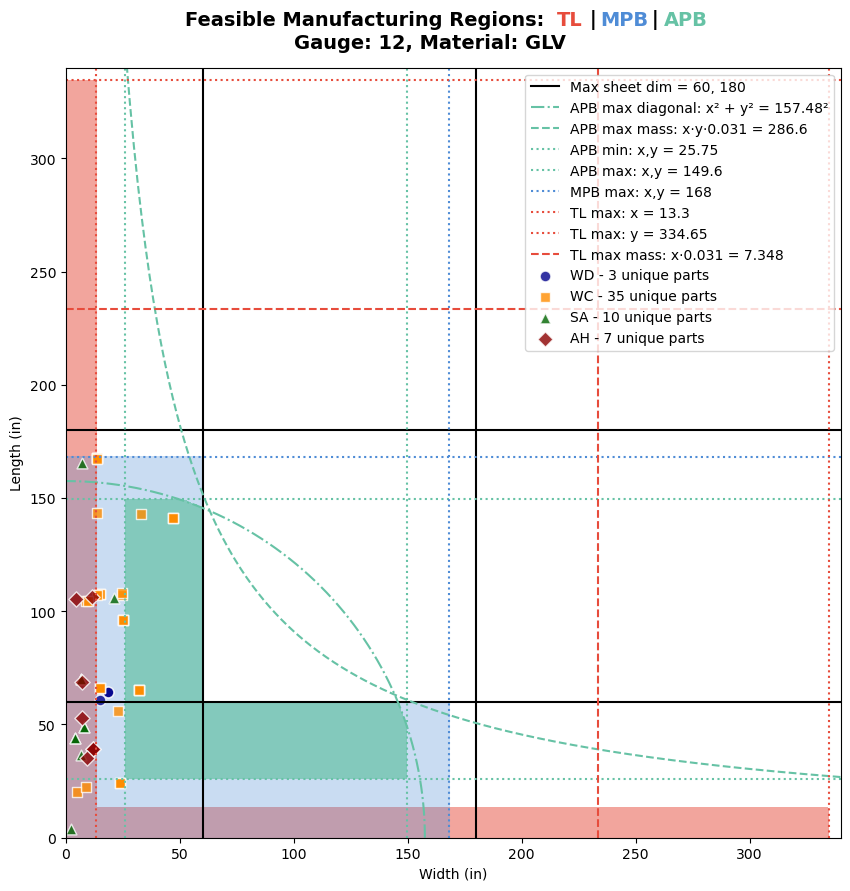

                                                    WD
total_parts                                          2
unique_part_counts       {'TL': 0, 'MPB': 2, 'APB': 0}
total_weight                                    139.32
weight_counts       {'TL': 0, 'MPB': 139.32, 'APB': 0}
                                                            WC
total_parts                                                 81
unique_part_counts             {'TL': 0, 'MPB': 53, 'APB': 28}
total_weight                                           18698.7
weight_counts       {'TL': 0, 'MPB': 13807.34, 'APB': 4891.36}
                                                    SA
total_parts                                          7
unique_part_counts       {'TL': 7, 'MPB': 0, 'APB': 0}
total_weight                                    147.39
weight_counts       {'TL': 147.39, 'MPB': 0, 'APB': 0}
                                                   AH
total_parts                                         1
unique_part_counts      {'T

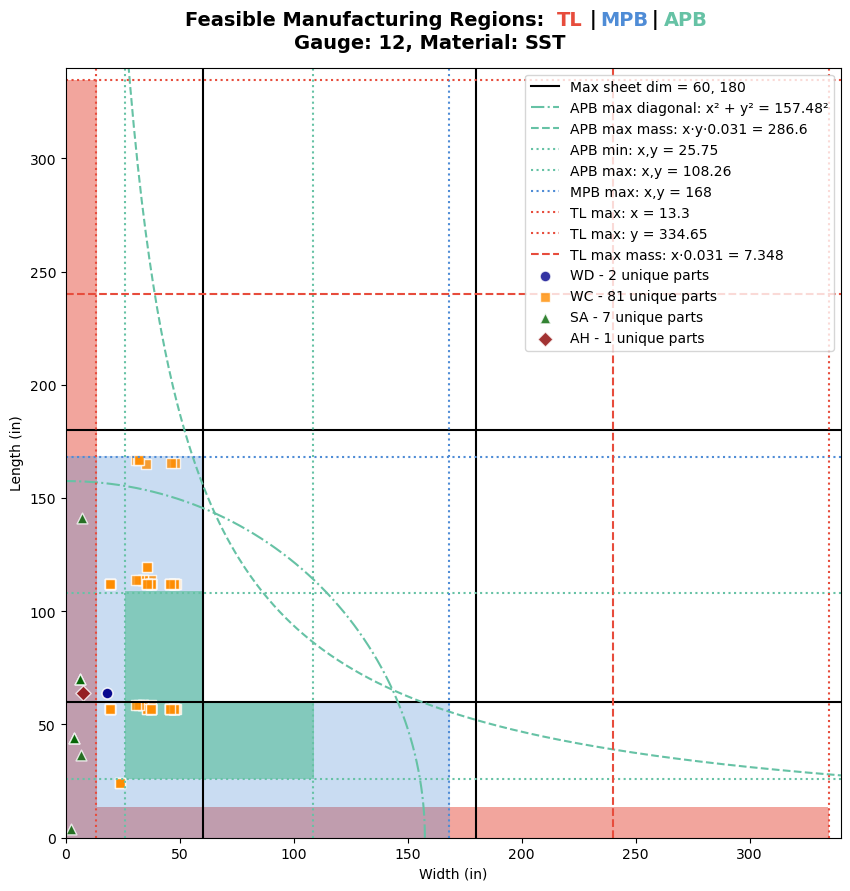

                                                              WD
total_parts                                                   26
unique_part_counts                {'TL': 15, 'MPB': 6, 'APB': 5}
total_weight                                             1717.18
weight_counts       {'TL': 286.22, 'MPB': 893.62, 'APB': 537.35}
                                                           WC
total_parts                                                24
unique_part_counts            {'TL': 13, 'MPB': 0, 'APB': 11}
total_weight                                          3571.29
weight_counts       {'TL': 1346.32, 'MPB': 0, 'APB': 2224.97}
                                                   SA
total_parts                                         5
unique_part_counts      {'TL': 5, 'MPB': 0, 'APB': 0}
total_weight                                    231.5
weight_counts       {'TL': 231.5, 'MPB': 0, 'APB': 0}
                                                        AH
total_parts                         

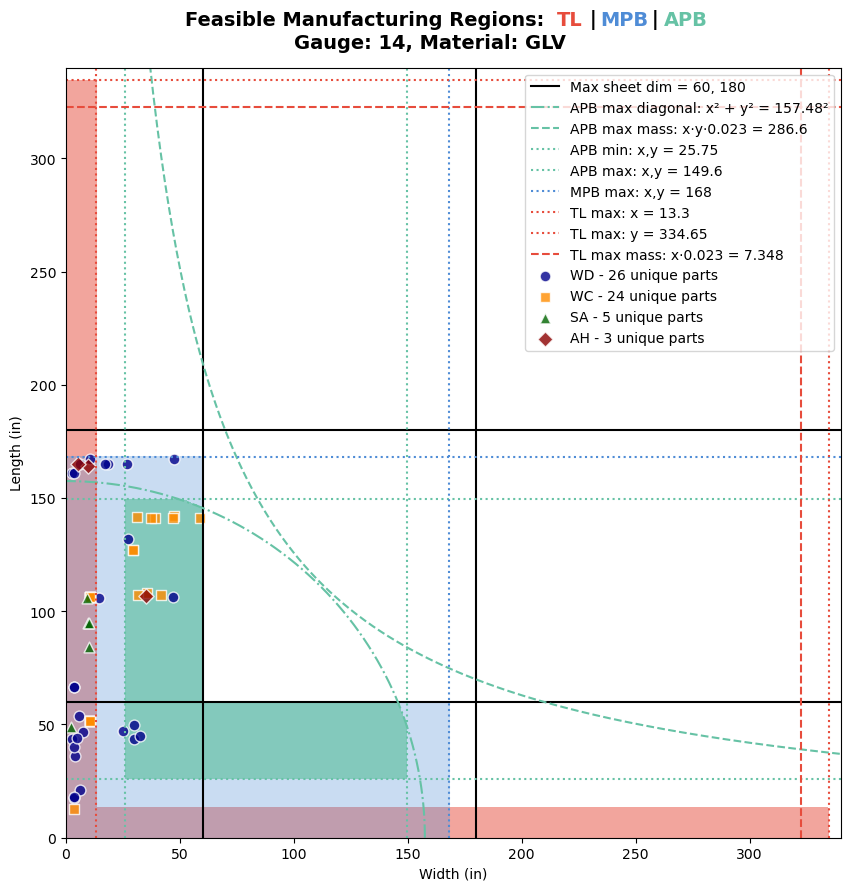

                                                             WD
total_parts                                                  13
unique_part_counts                {'TL': 7, 'MPB': 4, 'APB': 2}
total_weight                                            1207.87
weight_counts       {'TL': 195.54, 'MPB': 669.9, 'APB': 342.42}
                                                          WC
total_parts                                               16
unique_part_counts            {'TL': 0, 'MPB': 12, 'APB': 4}
total_weight                                         4619.38
weight_counts       {'TL': 0, 'MPB': 3945.12, 'APB': 674.26}
                                                    SA
total_parts                                          3
unique_part_counts       {'TL': 3, 'MPB': 0, 'APB': 0}
total_weight                                    219.71
weight_counts       {'TL': 219.71, 'MPB': 0, 'APB': 0}
                                                   AH
total_parts                                   

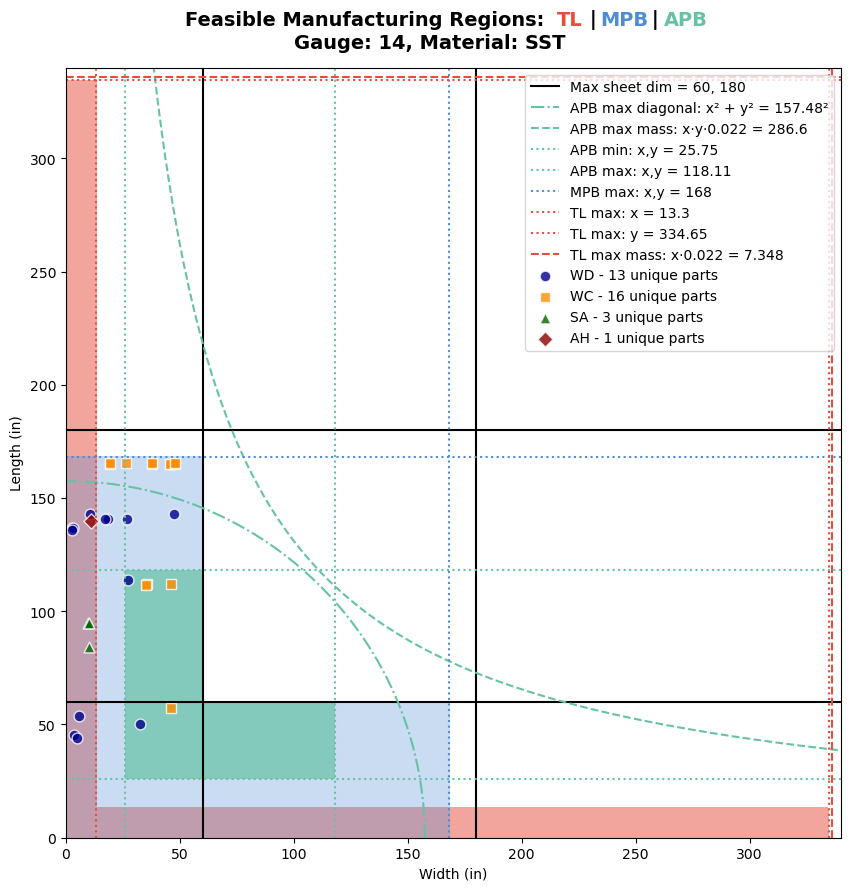

                                                  WC
total_parts                                        1
unique_part_counts     {'TL': 1, 'MPB': 0, 'APB': 0}
total_weight                                    6.18
weight_counts       {'TL': 6.18, 'MPB': 0, 'APB': 0}
                                                              SA
total_parts                                                   25
unique_part_counts                {'TL': 6, 'MPB': 5, 'APB': 14}
total_weight                                             1468.99
weight_counts       {'TL': 63.41, 'MPB': 106.45, 'APB': 1299.13}
                                                       AH
total_parts                                             3
unique_part_counts          {'TL': 1, 'MPB': 0, 'APB': 2}
total_weight                                       255.05
weight_counts       {'TL': 6.37, 'MPB': 0, 'APB': 248.68}


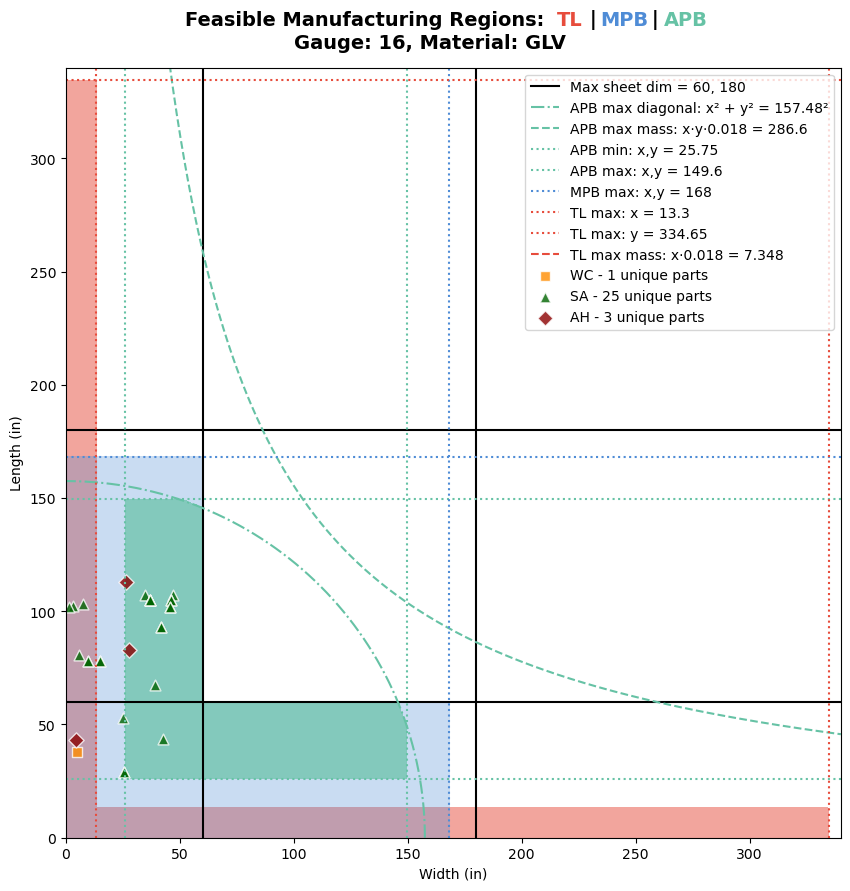

                                                    SA
total_parts                                          9
unique_part_counts       {'TL': 0, 'MPB': 0, 'APB': 9}
total_weight                                    872.39
weight_counts       {'TL': 0, 'MPB': 0, 'APB': 872.39}
                                                            AH
total_parts                                                  3
unique_part_counts               {'TL': 1, 'MPB': 1, 'APB': 1}
total_weight                                            262.18
weight_counts       {'TL': 26.02, 'MPB': 30.42, 'APB': 205.74}


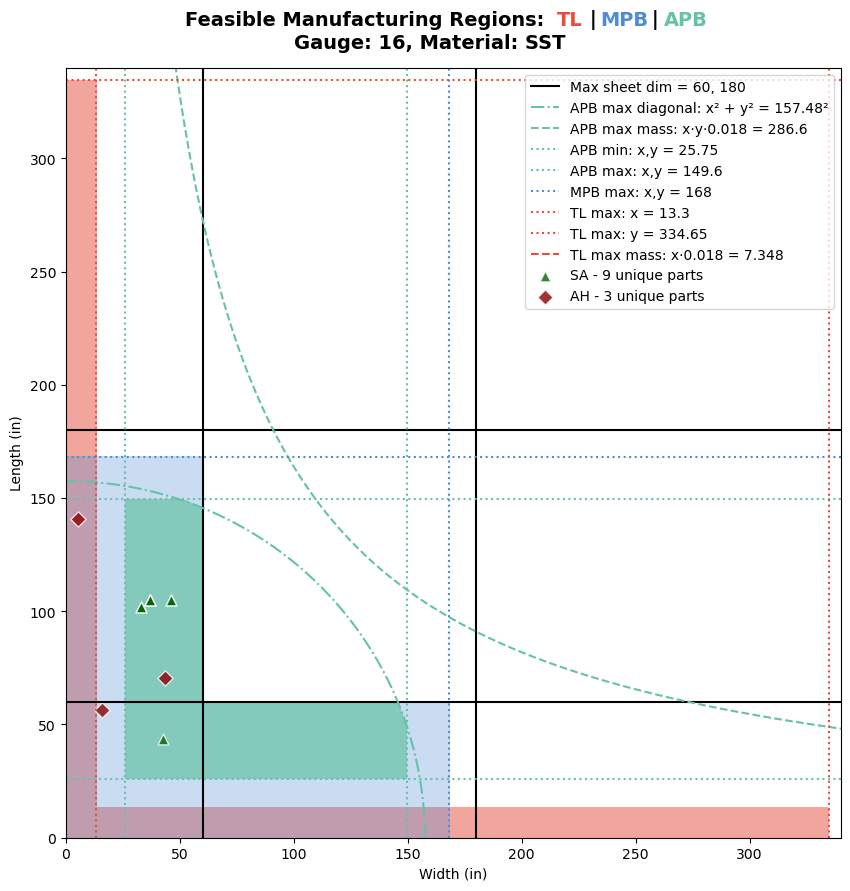

In [5]:
gauges = [8, 10, 12, 14, 16]
materials = ['GLV', 'SST']

# Plot all combinations
for gauge in gauges:
    for material in materials:
        cap = Capabilities(material, gauge)
        cap.plot_feasible_regions()
        part_set_stats = cap.add_part_sets(part_sets, get_stats=True)
        get_part_stats(part_set_stats)

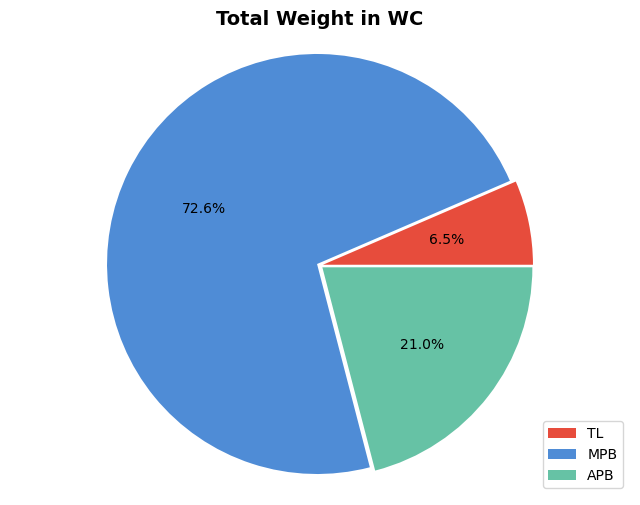

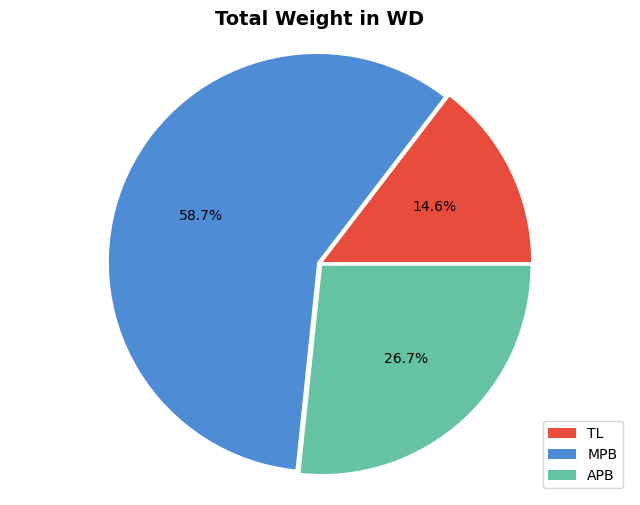

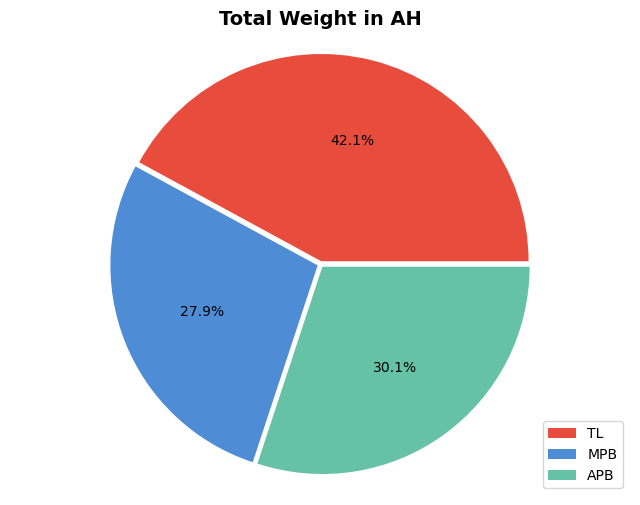

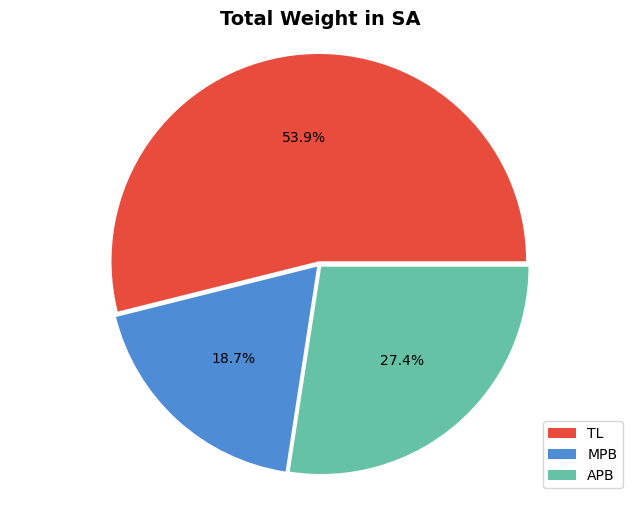

In [6]:
for submodule in all_stats.keys():
    if all_stats[submodule]['total_parts'] == 0:
        continue
    plot_pie_chart(all_stats[submodule]['weight_counts'], f'Total Weight in {submodule}')

In [7]:
for app in xw.apps:
    app.quit()

# Diagonal increase from (40,30) to (100,80)
# cap = Capabilities('GLV', 10)
# results = cap.plot_cost_run_chart(path, 5, 5, 55, 55, 'diagonal', 5)

# gauges = [8, 10, 12, 14, 16]
# materials = ['GLV', 'SST']
# for gauge in gauges:
#     for material in materials:
#         cap = Capabilities(material, gauge)
#         cap.plot_individual_cost_heatmap(path, fastener_spacing=3, bolt_diameter=0.3125)
#         cap.plot_optimal_cost_heatmap(path, fastener_spacing=3, bolt_diameter=0.3125)
#         cap.plot_cost_difference_heatmap(path, fastener_spacing=3, bolt_diameter=0.3125)